# Exercise 1: Linear regression
Initially we will work on 2D points and then expand it out to 3D.

We'll do the necessary imports for the notebook and then generate some data.

The data generation is as follows:
$$
x \sim \mathcal{N}(\mu_x, \sigma_x^2)
$$ 
with $\mu_x=1.5$ being the mean and $\sigma_x = 2.5$ being the standard deviation.

We also add a normally distributed error term with zero mean $\mu_\epsilon=0$ and standard deviation
$\sigma_\epsilon=0.5$.

In [1]:
import numpy as np
import open3d as o3d
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# Generate 'random' data
np.random.seed(0)
x = np.random.normal(1.5, 2.5, 100)   # Array of 100 values with mean = 1.5, stddev = 2.5
res = np.random.normal(0, 0.5, 100)       # Generate 100 residual terms (mean=0, std=0.5)
y = 2 + 0.3 * x + res                  # Actual values of Y


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


We can use the linear regression algorithm from the `sklearn` package.
Here, we setup the model to fit `x` to `y`.

In [2]:
x_r = x.reshape(-1,1) #fit needs x in this shape
# Initialise and fit model
lm = LinearRegression()
model = lm.fit(x_r, y)

We can now predict new outcomes given new data.

In [3]:
# Draw a new datapoint
tst_x = 2.5 * np.random.randn(1).reshape(-1,1) + 1.5   
print(tst_x)
resulting_y = model.predict(tst_x)
print(resulting_y)

[[0.57704541]]
[2.18951787]


Drawing 200 new samples and plotting them as a line shows us that we have gotten a decent fit.

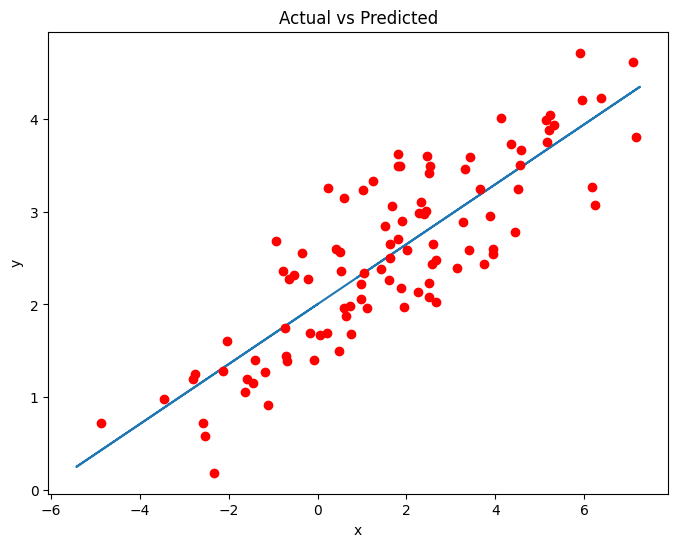

In [4]:
new_x = 2.5 * np.random.randn(200).reshape(-1,1) + 1.5   
predicted = model.predict(new_x)
plt.figure(figsize=(8, 6))
plt.plot(new_x, predicted)     # regression line
plt.plot(x, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Exercises
### A
Using [Ordinary Least Squares (OLS)](https://en.wikipedia.org/wiki/Ordinary_least_squares), attempt to get a regression line that is equal to the one `sklearn` provides.

Assuming that the data is modeled by the following, having $N$ data points available:
$$
\underbrace{\hat{\mathbf{y}}}_{N \times 1} = \underbrace{\beta^\text{*}}_{N\times (K+1)} \underbrace{\mathbf{X}}_{(K+1) \times 1} + \underbrace{\varepsilon}_{N \times 1} 
$$
Ordinary Least squares optimizes the parameters $\beta$ such that the resdiual error (measured by the Sum of Squared Errors (SSE) objective/loss function $L$) is minimal (regression). That is:
$$
L(\mathbf{X}_i, y_i;\mathbf{\beta}) = \sum_{i=1}^N (y_i - \hat{y_i})^2 \\
\beta^\text{*} = \argmin_\beta L(\mathbf{X}, \mathbf{y};\beta)
$$
where $y_i$ is the true value and $\hat{y_i}$ is the predicted value given a point $\mathbf{X}_i \in \mathbb{R}$.
We won't go into detail here how to solve this optimization problem but instead give you the solution directly:
$$
\beta^\text{*} = (\mathbf{X}^\top \mathbf{X})^{-1}\mathbf{X}^\top \mathbf{y}
$$
Using this, you need to organize your data in matrices of shapes $(N, K+1)$ for $\mathbf{X}$ with $N$ being the number of data points and $K$ being the dimension of $\mathbf{X_i}$, i.e. $\mathbf{X}_i \in \mathbb{R}^K$. The $+1$ is for the intercept, so $\beta_0$ will be our intercept term. For $\mathbf{y}$, you need to make sure it is of shape $(N, 1)$. So, the first row of $\mathbf{X}$ would look like this if $\mathbf{X}_i \in \mathbb{R}$:
$$
\mathbf{X_0} = \begin{bmatrix}1 & x_{1,0}\end{bmatrix}
$$
<details open>
<summary>If the above formulation is too complicated, here's another formulation</summary>
<br>
Assuming
Yₑ = α + β X

![ols.gif](ols.gif "ols")

- β = Cov(X, Y) / Var(X).
- α = mean(Y)-β*mean(X)

</br>
</details>

### B
Extend what we have shown above to 3D predict a plane using Linear regression given a point cloud.

Planes can be plotted with 
```{Python}
x = np.linspace(start, end, n)
y = np.linspace(start, end, n)
xx, yy = np.meshgrid(x_t, y_t)

ax.plot_surface(xx, yy, predicted_zz, alpha=0.2)
```

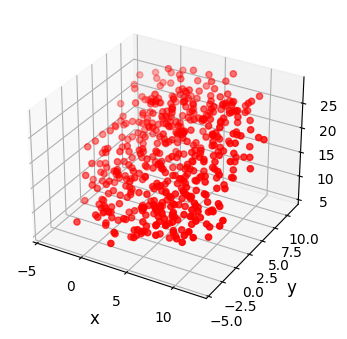

In [5]:
# Creating a pointcloud.
pc = o3d.io.read_point_cloud("TestData/spread_points.ply")
xyz = np.asarray(pc.points)

fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection='3d')
ax.scatter3D(xyz[:,0], xyz[:,1], xyz[:,2], color = 'red')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
plt.show()


In [12]:
## We want to predict Z
xy = xyz[:,:2] # our inputs
z = xyz[:,2].reshape(-1,1) # our targets

print(xy.shape)
print(z.shape)
X = np.hstack((np.ones((xy.shape[0], 1)), xy))

# use formula from above
beta = np.linalg.pinv(X.T @ X) @ X.T @ z
print(beta)


(500, 2)
(500, 1)
[[10.81363742]
 [ 0.03244937]
 [ 1.52695522]]


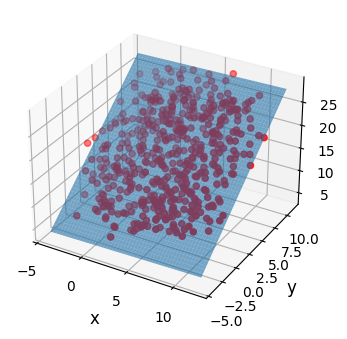

In [15]:
x = np.linspace(xy[:,0].min(), xy[:,0].max(), xy.shape[0])
y = np.linspace(xy[:,1].min(), xy[:,1].max(), xy.shape[0])
xx, yy = np.meshgrid(x, y)
predicted_zz = beta[0] + beta[1]*xx + beta[2]*yy


fig = plt.figure(figsize=(6,4))
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, predicted_zz, alpha=0.6)
ax.scatter3D(xyz[:,0], xyz[:,1], xyz[:,2], color = 'red')
ax.set_xlabel('x', fontsize=12)
ax.set_ylabel('y', fontsize=12)
ax.set_zlabel('z', fontsize=12)
plt.show()